# Analyse et prévision des coûts de l’assurance médicale

***Introduction***

Cette analyse présente une étude approfondie des frais annuels d'assurance médicale basée sur un ensemble de données contenant 1 338 enregistrements. Chaque enregistrement représente les caractéristiques d'un individu et comprend les variables suivantes : âge, sexe, indice de masse corporelle (IMC), nombre d'enfants, statut tabagique, région géographique aux États-Unis, et le coût d'assurance annuel (charges). L'objectif principal de cette analyse est de comprendre les facteurs qui influencent les frais d'assurance, d'identifier des tendances clés, et de développer des modèles prédictifs permettant d'anticiper les coûts en fonction des caractéristiques démographiques et de santé.


L'ensemble de données comprend 1 338 enregistrements. Chaque enregistrement contient les données ci-dessous pour une personne spécifique.

    - age – Âge de la personne

    - sex – Sexe de la personne

    - bmi – Indice de masse corporelle (IMC) de la personne

    - children – Nombre d’enfants pour la personne

    - smoker – Statut tabagique de la personne

    - region – Région de la personne aux États-Unis

    - charges – Frais d’assurance médicale par an pour la personne

***Grandes étapes de l'analyse***

    1. Préparation et exploration des données : Importation des données, nettoyage (traitement des valeurs manquantes, si applicable), et exploration statistique initiale des frais d'assurance pour en comprendre la répartition.

    2. Analyse exploratoire des données (EDA) : Visualisations graphiques pour étudier l'influence de chaque variable (ex. sexe, IMC, statut de fumeur, etc.) sur les coûts d'assurance, afin de dégager des tendances et des relations entre les variables.

    3. Modélisation prédictive : Application de modèles de régression pour prédire les frais d'assurance en fonction des caractéristiques disponibles. Comparaison des performances des modèles pour identifier le plus précis.

    4. Évaluation des résultats : Mesure de l’efficacité du modèle à l'aide de métriques comme l'erreur quadratique moyenne (RMSE) et l'analyse des résidus.

    5. Conclusion : Synthèse des résultats, implications des observations...

## Initialisation

In [4]:
# Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import du dataset

df = pd.read_csv("insurance.csv")
df_copy = df.copy()
df_copy = df_copy.dropna()
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Exploration des données

In [8]:
# Dans un premier temps, on analyse les descriptions statistiques des couts de manière globale

df_copy["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

***Observations*** : 

    - cout moyen => 1 327 dollards
    - cout minimum => 1 121 dollards
    - cout maximum => 6 3770 dollards
    - cout median => 9 382 dollards

In [11]:
# Création de catégorie pour l'age et le bmi pour simplifier l'analyse

def age_category(age):
    age_dict = {
            0: '0-9',
            1: '10-19',
            2: '20-29',
            3: '30-39',
            4: '40-49',
            5: '50-59',
            6: '60-69',
            7: '70-79',
            8: '80-89',
            9: '90-99',
            10: '100-200'
        }
    return age_dict[age//10]

def bmi_category(bmi):
    if bmi < 18.5:
        return "under-weight"
    elif 18.5 < bmi < 24.9:
        return "normal-weight"
    elif 25 < bmi < 29.9:
        return "over-weight"
    elif bmi > 30:
        return "obese"

    
df_copy["bmi_category"] = df_copy['bmi'].apply(bmi_category)
df_copy["age_category"] = df_copy["age"].apply(age_category)
df_copy

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_category
0,19,female,27.900,0,yes,southwest,16884.92400,over-weight,10-19
1,18,male,33.770,1,no,southeast,1725.55230,obese,10-19
2,28,male,33.000,3,no,southeast,4449.46200,obese,20-29
3,33,male,22.705,0,no,northwest,21984.47061,normal-weight,30-39
4,32,male,28.880,0,no,northwest,3866.85520,over-weight,30-39
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese,50-59
1334,18,female,31.920,0,no,northeast,2205.98080,obese,10-19
1335,18,female,36.850,0,no,southeast,1629.83350,obese,10-19
1336,21,female,25.800,0,no,southwest,2007.94500,over-weight,20-29


In [12]:
# Répartition des personnes en fonction des différentes colonnes

print(df_copy["sex"].value_counts())
print("-----------------")

print(df_copy["region"].value_counts())
print("-----------------")

print(df_copy["smoker"].value_counts())
print("-----------------")

print(df_copy["children"].value_counts())
print("-----------------")

print(df_copy["age_category"].value_counts())
print("-----------------")

print(df_copy["bmi_category"].value_counts())
print("-----------------")

sex
male      676
female    662
Name: count, dtype: int64
-----------------
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
-----------------
smoker
no     1064
yes     274
Name: count, dtype: int64
-----------------
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
-----------------
age_category
20-29    280
40-49    279
50-59    271
30-39    257
10-19    137
60-69    114
Name: count, dtype: int64
-----------------
bmi_category
obese            705
over-weight      372
normal-weight    221
under-weight      20
Name: count, dtype: int64
-----------------


Data distribution analysys


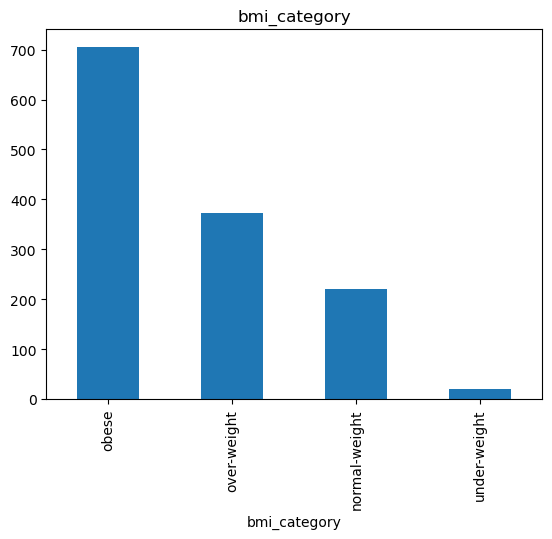

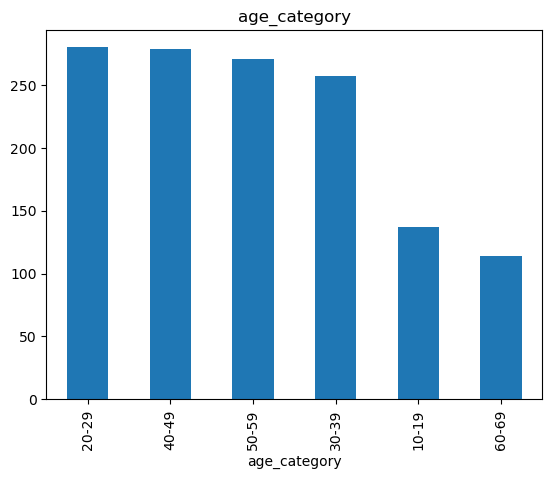

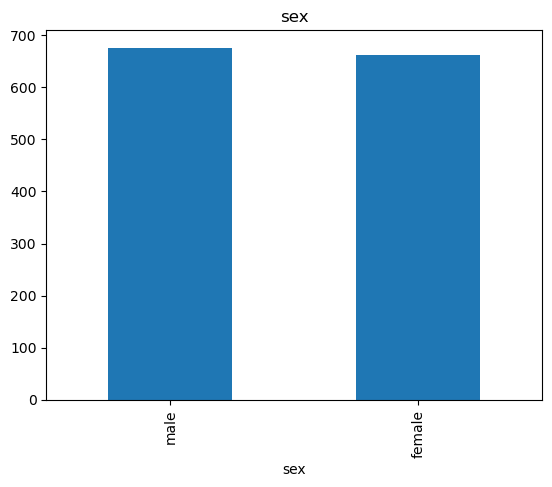

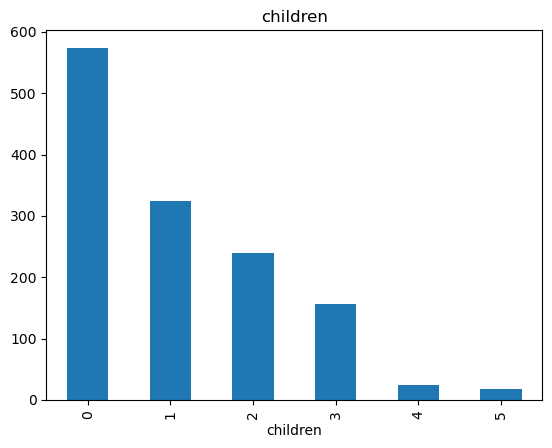

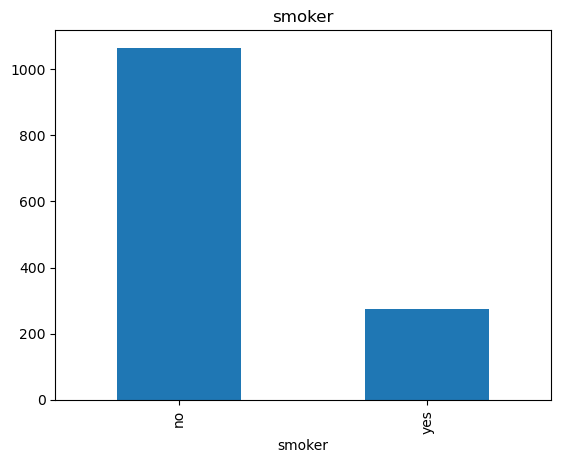

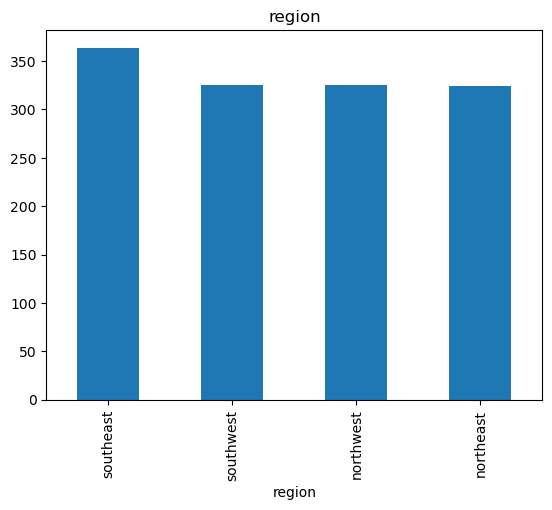

In [13]:
# Visualisation de la répartition des personnes en fonction des différentes colonnes

df_colomns = ["bmi_category", "age_category", "sex", "children", "smoker", "region"]

print('Data distribution analysys')
for i in df_colomns:
    df_copy[i].value_counts().plot(kind="bar")
    plt.title(i)
    plt.show()

***Observations*** : 

    Catégorie de l'IMC : Près de la moitié de la population souffre d'obésité.
    Catégorie d'âge : La majorité des individus se situe dans la tranche d'âge de 20 à 60 ans.
    Sexe : La distribution entre les sexes est relativement équilibrée.
    Enfants : La plupart des personnes ont entre 0 et 3 enfants, avec une prédominance d'individus n'ayant pas d'enfants.
    Fumeur : Une très grande majorité de la population ne fume pas.
    Région : La population est bien répartie à travers les différentes régions.

Mean cost analysys:


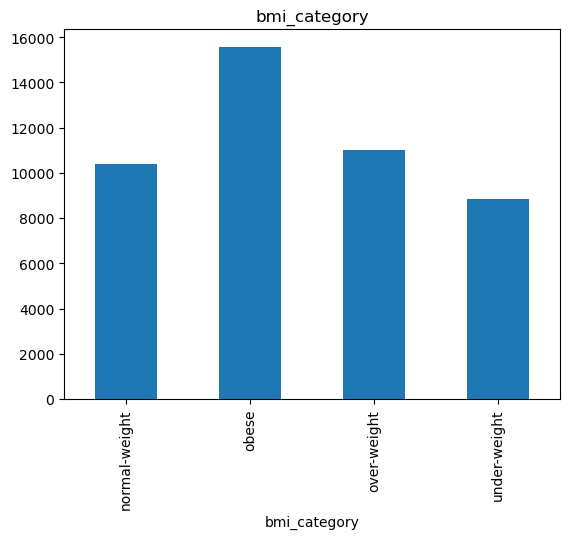

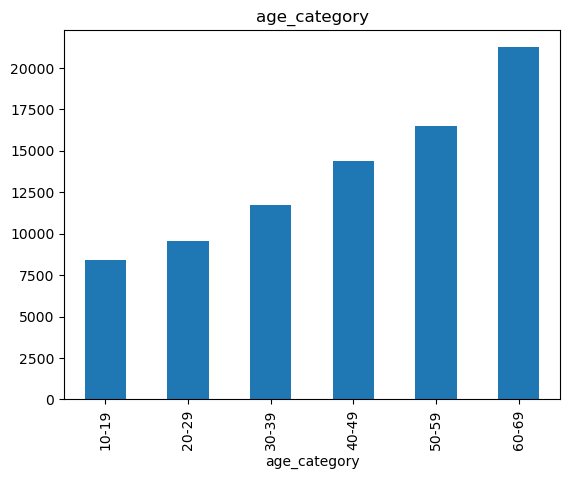

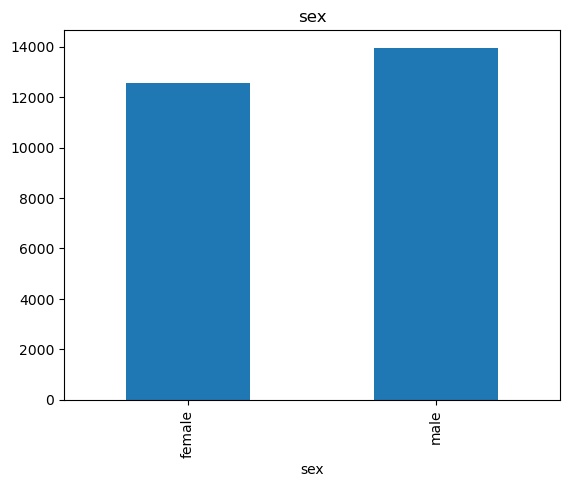

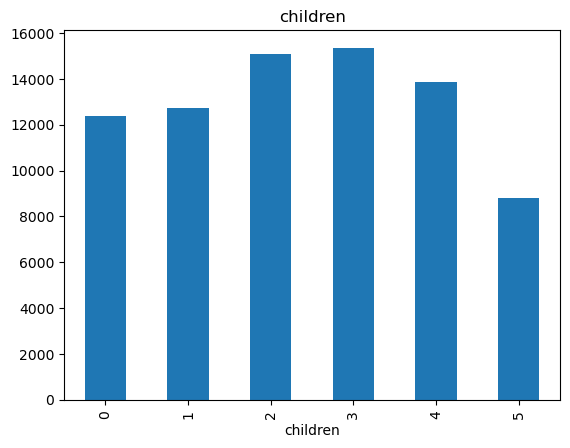

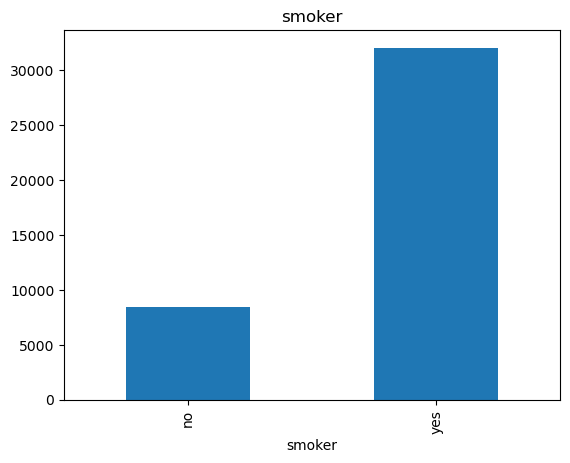

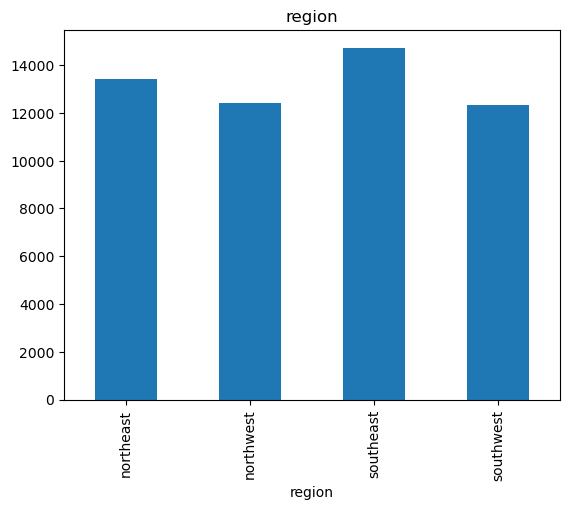

In [15]:
# Visualisation du cout moyen des charges d'assurance en fonction des différents critères (les colonnes)

df_colomns2 = ["bmi_category", "age_category", "sex", "children", "smoker", "region"]

print('Mean cost analysys:')

for i in df_colomns2:
    group_df = df_copy.groupby(i)['charges'].mean()
    group_df.plot(y = ['charges'],kind = 'bar')
    plt.title(i)
    plt.show()
    

***Observations*** : 

    - Catégorie de l'IMC : Les couts d'assurance sont plus élevés pour les obèses.
    - Catégorie d'âge : Plus on est vieux et plus les couts sont élevés. Du coup les 60-69 ans ont les couts les plus élevés.
    - Sexe : Les couts d'assurance sont légèrement plus élevés pour les hommes.
    - Enfants : Les couts d'assurance sont plus élevés pour les personnes ayant 2 ou 3 enfants. C'est étonnament plus élevés que les personnes ayant 4 ou 5 enfants.
    - Fumeur : Les couts d'assurance sont beaucoup plus élevés pour les fumeurs.
    - Région : Les couts d'assurance sont plus élevés dans la région du southeast.

En conclusion, l'analyse exploratoire met en évidence des variables critiques comme **l'âge, l'IMC et le statut de fumeur qui influencent fortement les frais d'assurance**. Ces résultats offrent une base solide pour orienter la construction des modèles prédictifs, en se concentrant sur les caractéristiques ayant un effet important sur les coûts.

## Prédiction des couts d'assurance

### Régression Linéaire

In [20]:
# Import des librairies

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [21]:
# Encodage des variables catégorielles

df_encoded = pd.get_dummies(df_copy, drop_first=True)
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_category_obese,bmi_category_over-weight,bmi_category_under-weight,age_category_20-29,age_category_30-39,age_category_40-49,age_category_50-59,age_category_60-69
0,19,27.900,0,16884.92400,False,True,False,False,True,False,True,False,False,False,False,False,False
1,18,33.770,1,1725.55230,True,False,False,True,False,True,False,False,False,False,False,False,False
2,28,33.000,3,4449.46200,True,False,False,True,False,True,False,False,True,False,False,False,False
3,33,22.705,0,21984.47061,True,False,True,False,False,False,False,False,False,True,False,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False,True,False,False,False,False,False,True,False
1334,18,31.920,0,2205.98080,False,False,False,False,False,True,False,False,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False,True,False,False,False,False,False,False,False
1336,21,25.800,0,2007.94500,False,False,False,False,True,False,True,False,True,False,False,False,False


In [22]:
# Séparer les variables explicatives et la variable cible

x = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

print(x.shape)
print(y.shape)

(1338, 16)
(1338,)


In [23]:
# Division des données en ensembles d'entraînement et de test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 16)
(268, 16)
(1070,)
(268,)


In [24]:
# Entraînement du modèle de régression linéaire

modele = LinearRegression()
modele.fit(x_train, y_train)
modele.score(x_test, y_test)

test_score = modele.score(x_test, y_test)
train_score = modele.score(x_train, y_train)

print("Train score : " + str(train_score))
print("Test score : " + str(test_score))

Train score : 0.7517141027327019
Test score : 0.7853508598795196


In [25]:
# Évaluer le Modèle

predictions = modele.predict(x_test)

# Calcul du RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)  # RMSE
# Calcul du R²
r_squared = r2_score(y_test, predictions)  # R²

print("RMSE :", rmse)
print("R² :", r_squared)

RMSE : 5772.694926938762
R² : 0.7853508598795196


C:\Users\Melissa\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Dans l'ensemble, le modèle est raisonnablement bon pour prédire les charges d'assurance.

In [27]:
# Coefficients

coefficients = modele.coef_
print(coefficients)

[  268.15132348    83.57485551   547.8813651    -38.25725813
 23663.88804516  -455.87191591  -485.86506585  -804.12562433
  3653.13170229   425.24924625 -2682.72148682   362.30072758
 -1144.1532474  -1414.30303391  -474.44016406   317.17626286]


In [28]:
# Association des coefficients avec les noms des colonnes pour faciliter l'interprétation

coef_df = pd.DataFrame(coefficients, index=x.columns, columns=['Coefficient'])
print(coef_df)

                            Coefficient
age                          268.151323
bmi                           83.574856
children                     547.881365
sex_male                     -38.257258
smoker_yes                 23663.888045
region_northwest            -455.871916
region_southeast            -485.865066
region_southwest            -804.125624
bmi_category_obese          3653.131702
bmi_category_over-weight     425.249246
bmi_category_under-weight  -2682.721487
age_category_20-29           362.300728
age_category_30-39         -1144.153247
age_category_40-49         -1414.303034
age_category_50-59          -474.440164
age_category_60-69           317.176263


***Observations***

En conclusion, le modèle de régression linéaire explique bien les charges d'assurance, avec un R² de 75,2 %. Certaines variables, comme le fait d'être fumeur, l'âge, le nombre d'enfants, et l'obésité, sont fortement significatives et influencent beaucoup les charges. D'autres variables, comme le sexe ou certaines catégories d'âge et de régions, n'ont pas d'impact statistiquement significatif. Cependant, il existe un potentiel problème de multicolinéarité, à prendre en compte pour améliorer la stabilité du modèle.

### Arbre de décision

In [31]:
# Random Forest Regression

modele2 = RandomForestRegressor()
modele2.fit(x_train, y_train)
modele2.score(x_test, y_test)

train_score2 = modele2.score(x_train, y_train)
test_score2 = modele2.score(x_test, y_test)

print("train score : " + str(train_score2))
print("test score : " + str(test_score2))

train score : 0.9744398953157638
test score : 0.8649833684500259


***Conclusion :***

En comparant les performances des deux modèles, Random Forest et régression linéaire, il est clair que le Random Forest surpasse la régression linéaire. Le modèle de Random Forest a affiché un score d’entraînement de 0.976 et un score de test de 0.865, indiquant une forte capacité de généralisation et une aptitude à capturer des relations complexes au sein des données. En revanche, le modèle de régression linéaire a obtenu un score d’entraînement de 0.752 et un score de test de 0.785, ce qui montre qu’il est moins performant dans l’explication de la variance des charges d’assurance.

Ces résultats soulignent que bien que la régression linéaire soit plus simple à comprendre et à interpréter, elle peut être limitée par sa capacité à modéliser des relations non linéaires. En revanche, le Random Forest, par sa nature d'ensemble et sa capacité à gérer des interactions complexes, offre une meilleure précision pour ce type de données. De plus Les variables les plus influentes dans la prédiction des coûts sont le statut tabagique, l'IMC, et l'âge, validant les tendances observées lors de l'analyse exploratoire.
En conclusion, pour ce cas d’étude, le modèle Random Forest est à privilégier, car il fournit des prédictions plus robustes et précises que la régression linéaire.